In [37]:
# Import packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Q1. 1.What is the regional sales in the best performing country?


In [38]:
# Load the sales territory csv file
sales_territory = pd.read_csv('SalesTerritory.csv')
print(sales_territory)

   TerritoryID            Name CountryRegionCode          Group      SalesYTD   
0            1       Northwest                US  North America  7.887187e+06  \
1            2       Northeast                US  North America  2.402177e+06   
2            3         Central                US  North America  3.072175e+06   
3            4       Southwest                US  North America  1.051085e+07   
4            5       Southeast                US  North America  2.538667e+06   
5            6          Canada                CA  North America  6.771829e+06   
6            7          France                FR         Europe  4.772398e+06   
7            8         Germany                DE         Europe  3.805202e+06   
8            9       Australia                AU        Pacific  5.977815e+06   
9           10  United Kingdom                GB         Europe  5.012905e+06   

   SalesLastYear  CostYTD  CostLastYear                               rowguid   
0   3.298694e+06      0.0  

  CountryRegionCode  CountrySaleYTD
0                AU    5.977815e+06
1                CA    6.771829e+06
2                DE    3.805202e+06
3                FR    4.772398e+06
4                GB    5.012905e+06
5                US    2.641106e+07
       SalesYTD       Name
0  7.887187e+06  Northwest
1  2.402177e+06  Northeast
2  3.072175e+06    Central
3  1.051085e+07  Southwest
4  2.538667e+06  Southeast


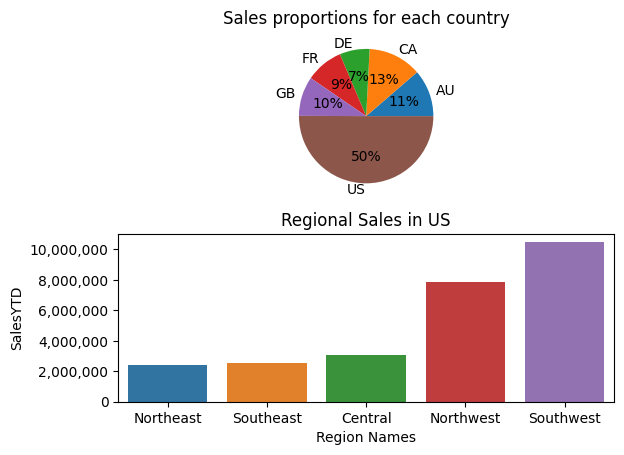

In [39]:
# Calculate the total sales for each country
countrySaleYTD = sales_territory.groupby('CountryRegionCode')['SalesYTD'].agg('sum').reset_index()
sales_by_country = pd.DataFrame(countrySaleYTD)
sales_by_country.columns = ['CountryRegionCode', 'CountrySaleYTD']

print(sales_by_country)

# plot charts
fig, ax = plt.subplots(nrows = 2)
# pie chart to show proportions for each country, the proportion on pychart only show whole number
ax[0].pie(sales_by_country['CountrySaleYTD'], labels=sales_by_country['CountryRegionCode'], autopct='%1.0f%%')
ax[0].set_title('Sales proportions for each country')

# slice the table to only US
regionalsale_US = sales_territory[sales_territory['CountryRegionCode'] == 'US'][['SalesYTD', 'Name']]
print(regionalsale_US)
# barplot for each region's sales in US
ax[1] = sns.barplot(x = 'Name', y = 'SalesYTD', data = regionalsale_US, order = regionalsale_US.sort_values('SalesYTD')['Name'])
ax[1].set_xlabel('Region Names')
ax[1].set_title('Regional Sales in US')
# showing the actual number not scientific notation
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x)))

### Q2. What is the relationship between annual leave taken and bonus?
We have selected the Bonus and Vacation Hours in the SQL server and generated a csv file called 'Bonus_AL.csv'

In [40]:
# Load the csv files
bonus_annual_leave = pd.read_csv('Bonus_AL.csv',names = ['Bonus', 'Vacation Hours'])
print(bonus_annual_leave)

     Bonus  Vacation Hours
0      0.0              14
1      0.0              20
2      0.0              21
3   5000.0              22
4   3500.0              23
5   2500.0              24
6   3550.0              26
7   2000.0              27
8   6700.0              29
9   5000.0              31
10   500.0              33
11   985.0              34
12    75.0              35
13  5650.0              36
14  5150.0              37
15  4100.0              38
16  3900.0              39


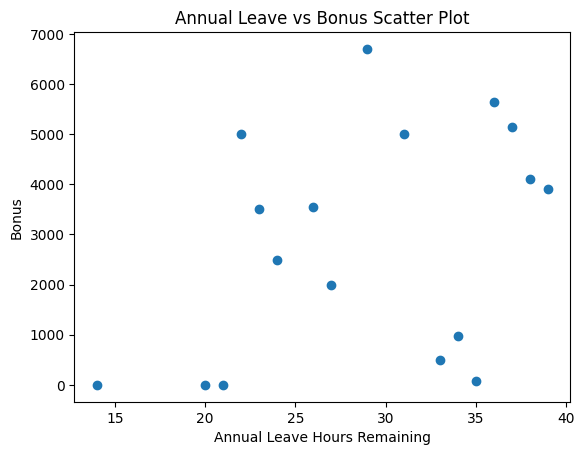

In [41]:
# Plot scatter plot for sales person's bonus and annual leave
fig1, ax1 = plt.subplots()
ax1.scatter(y = 'Bonus', x = 'Vacation Hours', data = bonus_annual_leave)
ax1.set_title('Annual Leave vs Bonus Scatter Plot')
ax1.set_xlabel('Annual Leave Hours Remaining')
ax1.set_ylabel('Bonus')
plt.show()

The Scatter plot shows a slightly positive relationship between Annual Leave hours remaining and the Bonus. It suggests while taking less Annual Leave may results in higher bonus, but other factors may also affect the bonus. 

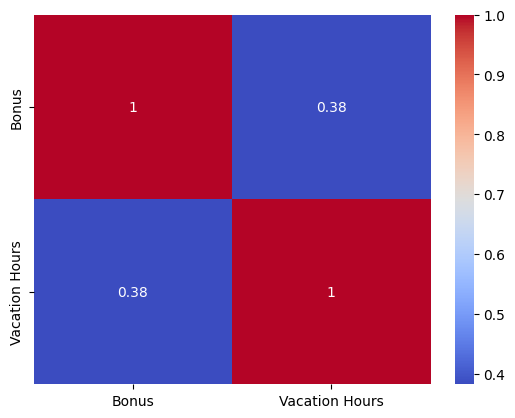

In [42]:
# Compute the correlation matrix
correlation_matrix = bonus_annual_leave.corr()

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Q3. What is the relationship between Country and Revenue?

In [43]:
# Load CSV file
col_names = ['BusinessEntityID', 'Name', 'AnnualSales', 'AnnualRevenue', 'BankName', 'Business Type', 'YearOpened','Specialty', 'SquareFeet','Brands','Internet','NumberEmployees','OpenDuration', 'CountryRegionName']
store_info = pd.read_csv('Store With Demographics_withCountryName.csv', names = col_names)
print(store_info.head())

   BusinessEntityID                      Name  AnnualSales  AnnualRevenue   
0              1288  Gear-Shift Bikes Limited     800000.0        80000.0  \
1               980           Wholesale Parts    3000000.0       300000.0   
2               418    Transportation Options     800000.0        80000.0   
3              1298           Racing Partners    3000000.0       300000.0   
4              1132        General Industries    1500000.0       150000.0   

                BankName Business Type  YearOpened Specialty  SquareFeet   
0        United Security            BM        1993      Road       21000  \
1  Primary International            OS        1996      Road       70000   
2        United Security            BM        1987  Mountain       20000   
3     International Bank            OS        1987  Mountain       79000   
4  Primary International            BS        1994      Road       42000   

  Brands Internet  NumberEmployees  OpenDuration CountryRegionName  
0     AW   

  CountryRegionName  AnnualRevenue
0         Australia      6420000.0
1            Canada     18040000.0
2            France      6650000.0
3           Germany      5900000.0
4    United Kingdom      6800000.0
5     United States     68980000.0


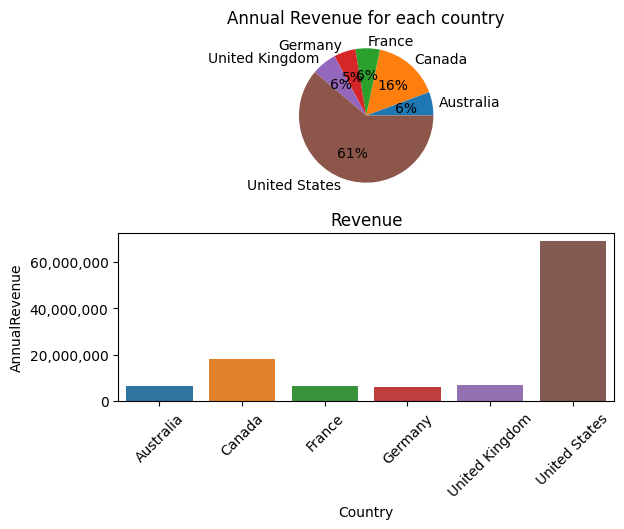

In [44]:
# Calculate Sum of Revenue grouped by country
countryAnnualRevenue = store_info.groupby('CountryRegionName')['AnnualRevenue'].agg('sum').reset_index()
revenue_by_country = pd.DataFrame(countryAnnualRevenue)
revenue_by_country.columns = ['CountryRegionName', 'AnnualRevenue']
print(countryAnnualRevenue)

# plot pie chart and bar plots
fig, ax = plt.subplots(nrows = 2)
ax[0].pie(revenue_by_country['AnnualRevenue'], labels=revenue_by_country['CountryRegionName'], autopct='%1.0f%%')
ax[0].set_title('Annual Revenue for each country')


ax[1] = sns.barplot(x = 'CountryRegionName', y = 'AnnualRevenue', data = revenue_by_country)
ax[1].set_xlabel('Country')
ax[1].set_title('Revenue')
ax[1].set_xticklabels(['Australia','Canada','France','Germany','United Kingdom','United States'], rotation=45)
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x)))

### Q4. What is the relationship between sick leave and Job Title?

In [45]:
# Import data for every employee
job_title_sick_leave_rate_individual= pd.read_csv('JobTitle_SL_with_rates.csv', names = ['Job Title', 'Department', 'Rate', 'Sick Leave Hours Left'])
print(job_title_sick_leave_rate_individual.head())

                       Job Title   Department      Rate  Sick Leave Hours Left
1        Chief Executive Officer    Executive  125.5000                     69
2  Vice President of Engineering  Engineering   63.4615                     20
3            Engineering Manager  Engineering   43.2692                     21
4           Senior Tool Designer  Tool Design    8.6200                     80
4           Senior Tool Designer  Tool Design   23.7200                     80


                        Job Title  Average Sick Leave Hours Left
0                      Accountant                      49.000000
1                Accounts Manager                      48.000000
2     Accounts Payable Specialist                      51.500000
3  Accounts Receivable Specialist                      50.333333
4          Application Specialist                      56.000000


C:\Users\Stephy\AppData\Local\Temp\ipykernel_14684\2443472257.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels = avg_sl_per_job['Job Title'])


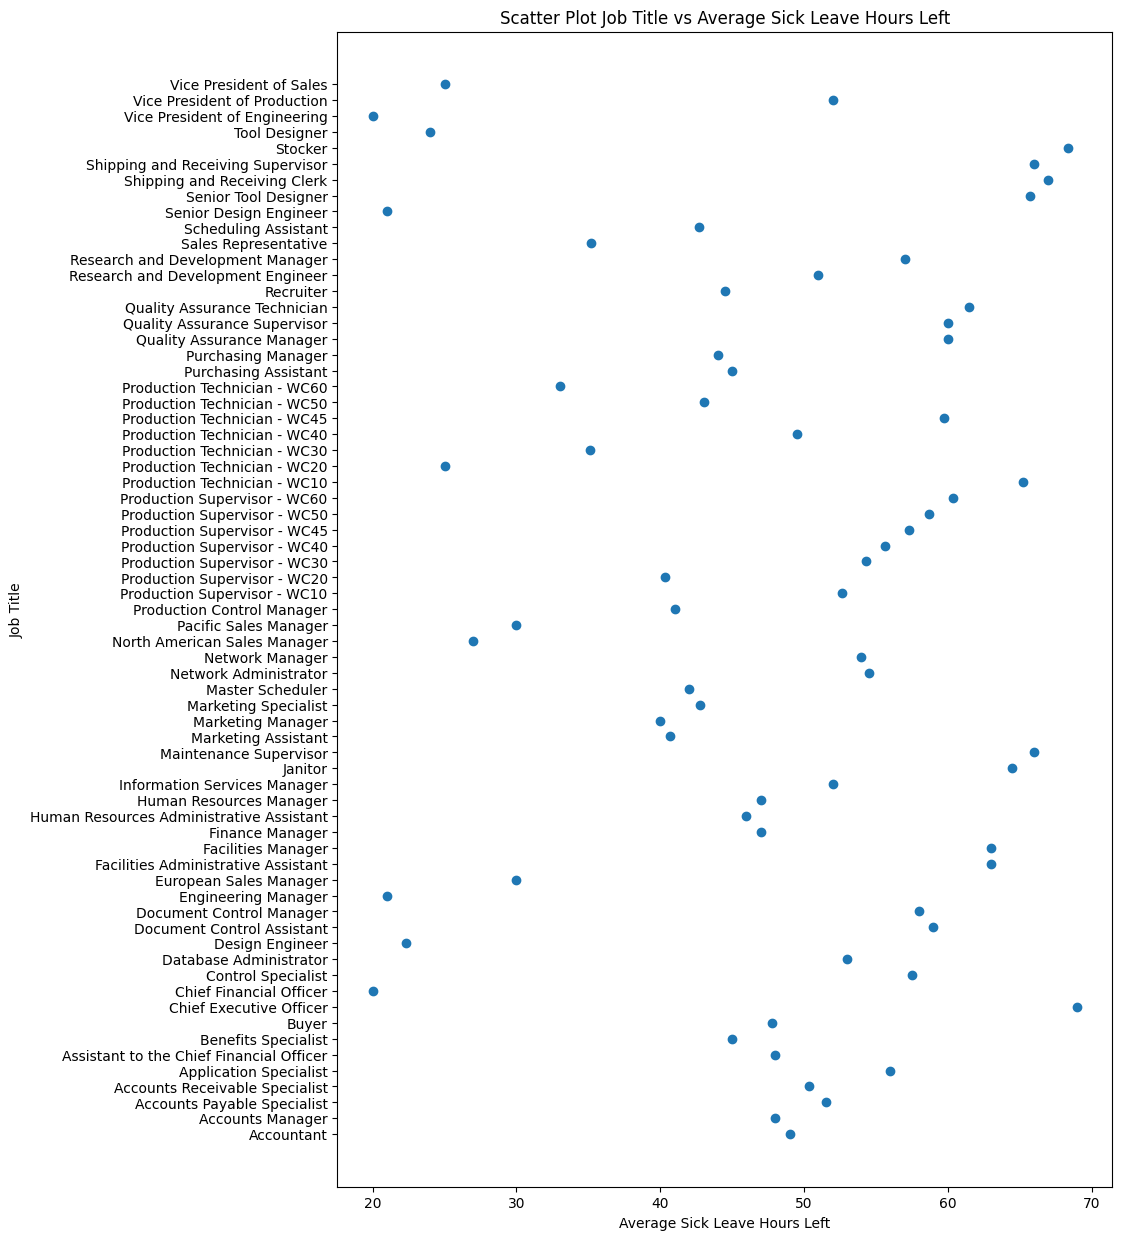

In [46]:
# Calculate Sum of Revenue grouped by country
avg_sl = job_title_sick_leave_rate_individual.groupby('Job Title')['Sick Leave Hours Left'].agg('mean').reset_index()
avg_sl_per_job = pd.DataFrame(avg_sl)
avg_sl_per_job.columns = ['Job Title', 'Average Sick Leave Hours Left']
print(avg_sl_per_job.head())

# Scatter plot for Average Sick Leave Hours left and Job Title
fig2, ax2 = plt.subplots(figsize = (10,15))
ax2.scatter(y = 'Job Title', x = 'Average Sick Leave Hours Left', data = avg_sl_per_job)
ax2.set_yticklabels(labels = avg_sl_per_job['Job Title'])
ax2.set_xlabel('Average Sick Leave Hours Left')
ax2.set_ylabel('Job Title')
ax2.set_title('Scatter Plot Job Title vs Average Sick Leave Hours Left')
plt.show()

Scatter Plot of different titles doesn't show strong linear relationships between each job title and Average Sick Leave remains

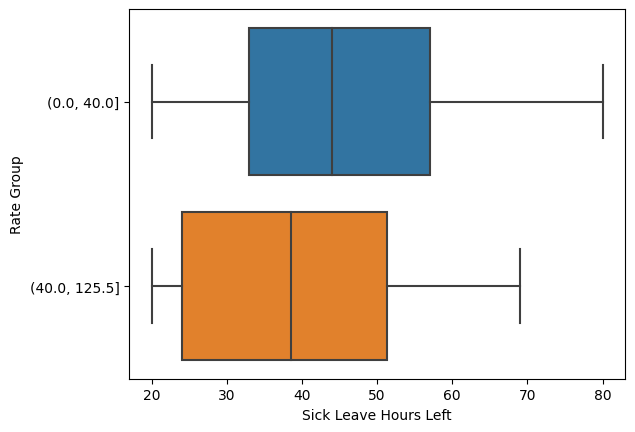

In [47]:
# Create a salary group to cut the salary into 0 - 40 and 40 or more, based on base salary in Australia, $40 or more means more skilled job titles
job_title_sick_leave_rate_individual['Rate Group'] = pd.cut(job_title_sick_leave_rate_individual['Rate'], bins = ([0, 40, job_title_sick_leave_rate_individual['Rate'].max()]))

# Plot a box plot to show the annual leave range 
ax3 = sns.boxplot(x = 'Sick Leave Hours Left', y = 'Rate Group', data = job_title_sick_leave_rate_individual)
plt.show()

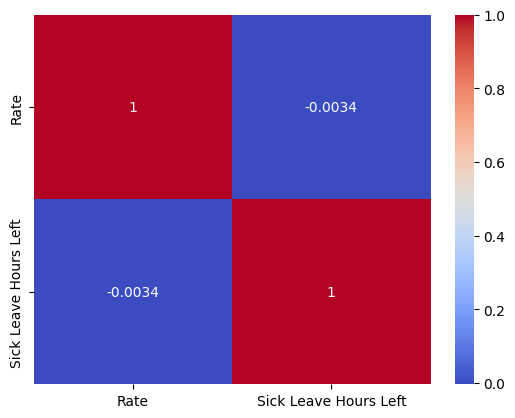

In [48]:
# Compute the correlation matrix
rates_SL = job_title_sick_leave_rate_individual[['Rate','Sick Leave Hours Left']]
correlation_rates_SL = rates_SL.corr()
# Create a heatmap using Seaborn
sns.heatmap(correlation_rates_SL, annot=True, cmap='coolwarm')
plt.show()

#### Q5 What is the relationship between store trading duration and revenue?

In [49]:
# Using dataset stor_info from Q3
# Add a new column "OpenDurationCategory" which categorises the values
# in the "OpenDuration" column into quartile categories using the pd.qcut() function.

categories = ['Q1', 'Q2', 'Q3', 'Q4']
store_info['OpenDurationCategory'] = pd.qcut(store_info['OpenDuration'], q=4, labels=categories)

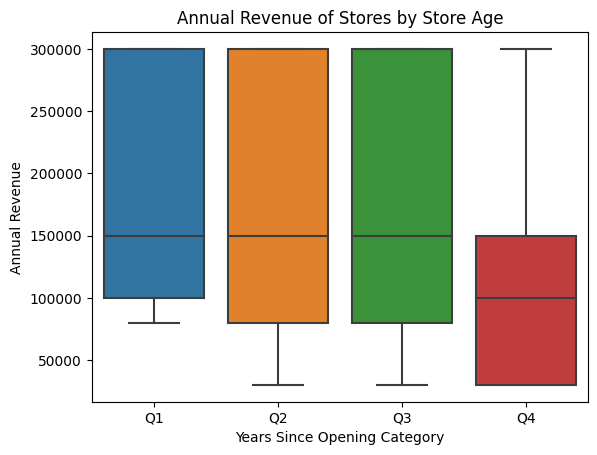

In [50]:
# Create a box plot using the Seaborn library to visualize the relationship 
# between the "AnnualRevenue" and "OpenDurationCategory" columns 
sns.boxplot(data=store_info,x='OpenDurationCategory',y='AnnualRevenue').set(title="Annual Revenue of Stores by Store Age")
plt.xlabel("Years Since Opening Category")
plt.ylabel("Annual Revenue")
plt.show()

#### Q6 What is the relationship between the size of the stores, number of employees and revenue?

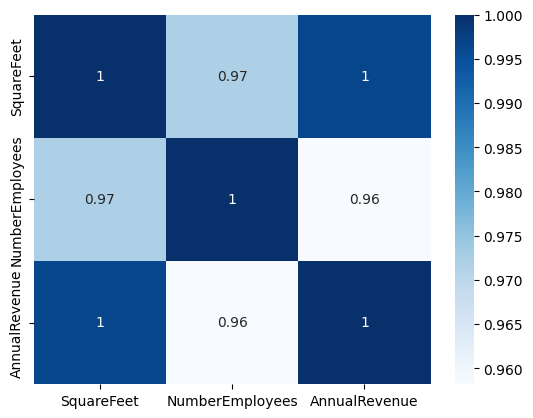

In [51]:
# Using dataset store_info from Q3
# Compute the correlation matrix between size, number of employees and revenue
size_employee_revenue = store_info[['SquareFeet', 'NumberEmployees','AnnualRevenue']]
correlation_store_size_employee_revenue = size_employee_revenue.corr()
# Create a heatmap using Seaborn
sns.heatmap(correlation_store_size_employee_revenue, annot=True, cmap='Blues')
plt.show()

From the Heat map we can see that There's a strong positive relationship between the size of the store and the annual revenue, and the number of employees.

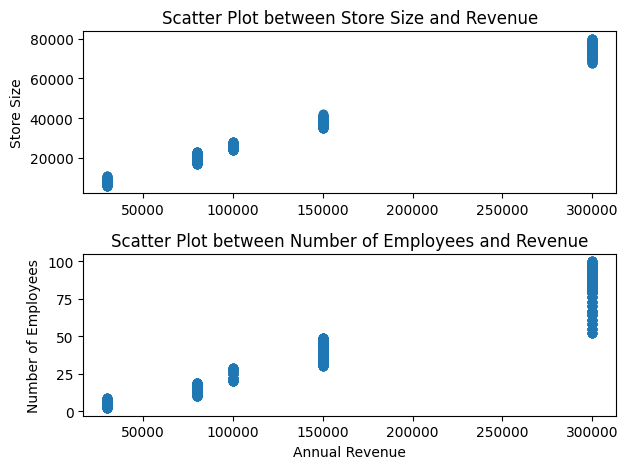

In [52]:
# Scatter plots between Store Size, Number of Employees and Revenue
fig5, ax5 = plt.subplots(nrows = 2)
ax5[0].scatter(y = 'SquareFeet', x = 'AnnualRevenue', data = store_info)
ax5[0].set_title('Scatter Plot between Store Size and Revenue')
ax5[0].set_ylabel('Store Size')


ax5[1].scatter(y='NumberEmployees', x = 'AnnualRevenue', data = store_info)
ax5[1].set_title('Scatter Plot between Number of Employees and Revenue')
ax5[1].set_ylabel('Number of Employees')
ax5[1].set_xlabel('Annual Revenue')

plt.tight_layout()


The scatter plot also confirms the result of the heat map, that is the larger size of the store, the more annual revenue.